In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

Fashion MNIST was designed to be a drop in replacement for the MNIST dataset.

MNIST is now a days considered too easy. It is considered to be a "solved problem".

Fashion MNIST is a datset of 28 x 28 grayscale images and it has the same number of samples.

So how is it different from the MNIST dataset?

Instead of simply handwritten digits, there are images of different types of clothing (tshirts, shoes, pants, and so forth). Our job is to classify these images into correct category.

The CIFAR 10 dataset that we will be studying later is older, but more difficult. This dataset consists of color images, so the dataset takes up more RAM and the images are also a bit bigger 32 x 32 x 3 color. It contains classes such as automobile, frog, cat, dog, horse. The problem during classification is due to such tiny images, it might be very easy to mistake a cat for a dog or a dog for a horse.



In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = [x_train / 255.0, x_test / 255.0]
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


**Note 1:**
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

load_data() return two tuples, 1st being train set and 2nd being the test set.

Each tuple is split up into two arrays, 

1. the input images stored as a numpy arrays and 

2. the labels also stored as a numpy arrays.

**Note 2:**
x_train.shape gives N x 28 x 28 grayscale, pixel values 0 to 255.
But, this is not the right shape for CNN. CNN expects N x H x W x C.
So in order to make a color channel, we have to add a fourth dimension to the X matrix of size 1, which simply means No data is being added. Essentially a superfluous dimension is added. Therefore the new shape will now become N x 28 x 28 x 1.

**Note 3:**
Luckily, CIFAR 10 data is N x 32 x 32 x 3, pixel values 0 to 255. So there is no inconvenience here as in Fashion MNIST. However, here the output labels are N x 1. But this is a very trivial issue. Simply using the flatten() of numpy gets the job done.


In [ ]:
# the data is only 2D!
# convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# number of classes
K = len(set(y_train)) # get the total number of unique values in y_train
print("number of classes:", K)

number of classes: 10


In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train[0].shape

(28, 28, 1)

In [ ]:
# Build the model using the Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

# Once we have a variable representing the input "i" and the variable representing the output "x", 
# we can pass these into the model constructor
model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 18s 4ms/step - loss: 0.5238 - accuracy: 0.8056 - val_loss: 0.3927 - val_accuracy: 0.8533
Epoch 2/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3658 - accuracy: 0.8624 - val_loss: 0.3432 - val_accuracy: 0.8734
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3140 - accuracy: 0.8817 - val_loss: 0.3180 - val_accuracy: 0.8825
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2784 - accuracy: 0.8944 - val_loss: 0.3089 - val_accuracy: 0.8878
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2524 - accuracy: 0.9045 - val_loss: 0.3052 - val_accuracy: 0.8900
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2296 - accuracy: 0.9132 - val_loss: 0.2939 - val_accuracy: 0.8979
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2115 - accuracy: 0.9196 - val_loss: 0.2973 - val_accuracy

**Observation:**
We are getting a decent accuracy. But, its definitely not as high as the classic MNIST. This is because as mentioned earlier by me, the fashion MNIST dataset is more difficult.

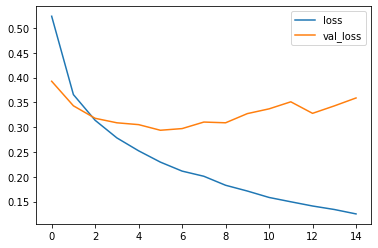

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**
It appears that the model is overfitting a little bit since we see that the validation loss is going slightly up. 

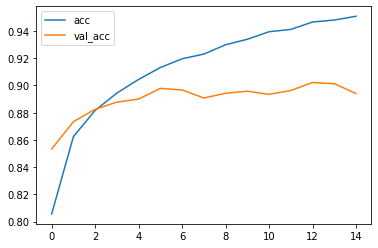

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**Observation:** 
Here, it appears that the validation accuracy stays pretty steady. This is interesting to see when the validation loss simultaneously goes up. It means that the model is becoming more and more confident in its incorrect predictions. 

Confusion matrix, without normalization
[[840   0  30  20   3   1 101   0   5   0]
 [  2 975   2  12   3   0   6   0   0   0]
 [ 12   1 867  12  50   0  58   0   0   0]
 [ 19   4  23 906  31   0  17   0   0   0]
 [  3   0  69  20 848   0  58   0   2   0]
 [  0   0   0   1   0 961   0  24   1  13]
 [129   1  97  26 100   0 636   0  11   0]
 [  0   0   0   0   0   8   0 971   0  21]
 [  1   2   4   3   1   2   5   3 979   0]
 [  1   0   0   0   0   7   0  34   0 958]]


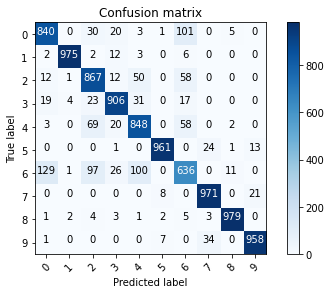

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Lets check the two most wrong predictions.

a. True Label = 0, Predicted Label = 6, Value = 135

b. True Label = 6, Predicted Label = 4, Value = 124

Lets check what those are below.

We observe that Prediction 'a' confuses "T-shirt/top" with "Shirt". And that makes sense too, because they are both shirts.

We also observe that Prediction 'a' confuses "Shirt" with "Coat". And that makes sense too, because they have the same shape, they are the clothes meant for covering our upper body.

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

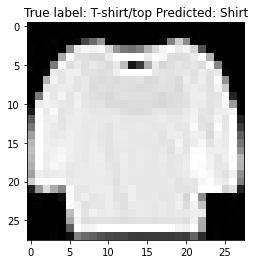

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

# Happy Learning